$\newcommand{\is}{\mathrel{\mathop:=}}$
$\newcommand{\range}{\mathop{ran}}$
$\newcommand{\setof}[1]{\left \{ #1 \right \}}$
$\newcommand{\card}[1]{\left | #1 \right |}$
$\newcommand{\tuple}[1]{\left \langle #1 \right \rangle}$
$\newcommand{\emptytuple}{\left \langle \right \rangle}$
$\newcommand{\tuplecat}{\cdot}$
$\newcommand{\stringcat}{\cdot}$
$\newcommand{\emptystring}{\varepsilon}$
$\newcommand{\String}[1]{\mathit{#1}}$
$\newcommand{\LeftEdgeSymbol}{\rtimes}$
$\newcommand{\RightEdgeSymbol}{\ltimes}$
$\newcommand{\LeftEdge}{\LeftEdgeSymbol}$
$\newcommand{\RightEdge}{\RightEdgeSymbol}$
$\newcommand{\mult}{\times}$
$\newcommand{\multisum}{\uplus}$
$\newcommand{\multimult}{\otimes}$
$\newcommand{\freqsymbol}{\mathrm{freq}}$
$\newcommand{\freq}[1]{\freqsymbol(#1)}$
$\newcommand{\prob}{P}$
$\newcommand{\counts}[2]{\card{#2}_{#1}}$
$\newcommand{\inv}[1]{#1^{-1}}$
$\newcommand{\Lex}{\mathit{Lex}}$
$\newcommand{\length}[1]{\left | #1 \right |}$
$\newcommand{\suc}{S}$
$\newcommand{\sprec}{<}$
$\newcommand{\Rcomp}[2]{#1 \circ #2}$
$\newcommand{\domsymbol}{\triangleleft}$
$\newcommand{\idom}{\domsymbol}$
$\newcommand{\pdom}{\domsymbol^+}$
$\newcommand{\rdom}{\domsymbol^*}$
$\newcommand{\indegree}[1]{\mathrm{in(#1)}}$
$\newcommand{\outdegree}[1]{\mathrm{out(#1)}}$
$\newcommand{\cupdot}{\cup\mkern-11.5mu\cdot\mkern5mu}$
$\newcommand{\mymatrix}[1]{\left ( \matrix{#1} \right )}$

**Prerequisites**

- multisets (basics)

# Set-of-words revisited: adding counts

I have a horrible confession to make: the previous unit contains a lie.
The set-of-words model isn't actually used in practice.
Instead, it's a bag-of-words model.
The bag-of-words model works like the set-of-words model, except that every word type also gets a number to indicate how often it occurs in the text.
Mathematically, this corresponds to the step from sets to multisets.

## Keeping track of counts

A multiset is like a set, except that it can contain one and the same element multiple times.
To highlight this difference, I will subscript multisets with an $M$ where necessary to avoid confusion.
So whereas $S$ denotes a set, $_MS$ denotes a multiset.

<div class=example>
The set-of-words model converts the mini-text *Only John could like John* (modulo capitalization) to the set $\setof{\text{only}, \text{john}, \text{could}, \text{like}}$.
The sentence *If police police police police police, then police police police police police* is converted to $\setof{\text{if}, \text{police}, \text{then}}$.

<br>
The bag-of-words model gives different results.
The first sentence is mapped to the multiset $\setof{\text{only}: 1, \text{john}: 2, \text{could}: 1, \text{like}: 1}$.
The second one yields $\setof{\text{if}: 1, \text{police}: 10, \text{then}: 1}$.
</div>

Just like sets, multisets aren't limited to unigrams.
One can just as well count bigrams, trigrams, and so on.

In [1]:
from collections import Counter

def ngram_list(text, n):
    return zip(*[text[pos:] for pos in range(n)])

def ngram_set(text, n):
    return set(ngram_list(text, n))

def ngram_multiset(text, n):
    return Counter(ngram_list(text, n))

sentence1 = ["only", "john", "could", "like", "john"]
sentence2 = ["if", "police", "police", "police", "police", "police",
             "then", "police", "police", "police", "police", "police"]

print("Set for\n{}\n is\n{}".format(" ".join(sentence1), ngram_set(sentence1, 2)))
print("Multiset for\n {}\n is\n{}".format(" ".join(sentence1), ngram_multiset(sentence1, 2)))
print()
print("Set for\n{}\n is\n{}".format(" ".join(sentence2), ngram_set(sentence2, 2)))
print("Multiset for\n{} is\n{}".format(" ".join(sentence2), ngram_multiset(sentence2, 2)))

Set for
only john could like john
 is
{('could', 'like'), ('only', 'john'), ('john', 'could'), ('like', 'john')}
Multiset for
 only john could like john
 is
Counter({('could', 'like'): 1, ('only', 'john'): 1, ('john', 'could'): 1, ('like', 'john'): 1})

Set for
if police police police police police then police police police police police
 is
{('police', 'then'), ('then', 'police'), ('police', 'police'), ('if', 'police')}
Multiset for
if police police police police police then police police police police police is
Counter({('police', 'police'): 8, ('police', 'then'): 1, ('then', 'police'): 1, ('if', 'police'): 1})


<div class=exercise>
Construct the trigram multiset for *if police police police police police, then police police police police police*.
</div>

## Counts for frequencies

One major advantage the proper bag-of-words model has over the set-of-words model is that the counts provide direct information about frequency, which can be used in various ways.
Given a multiset $_MS$, the frequency of some $s \in _MS$ is the count of $s$ divided by the total of all counts.
In mathematical notation, the frequency of $s$ is
$$\freq{s} \is \frac{_MS(s)}{\card{_MS}}$$
where $\card{_M S}$ is the total of all counts.

We can replace the absolute counts in a bag-of-words by relative frequencies.
Strictly speaking this is no longer a multiset, since the values for a multiset can only be natural numbers.
It's impossible for a multiset to contain an item .73 times.
In addition, relative frequencies destroy information: an item with frequency .5 could have occurred 5 times, 500, or 5 trillion.
It's impossible to tell unless one knows the total size of the corpus that the counts were collected from.

In practice, it is best to keep the bag of words untouched and store the frequencies separately.
But just for notation, it is often nicer to have frequencies instead of counts.

<div class=example>
Let's go back to the multiset 
$_MS \is \setof{\text{if police}: 1, \text{police police}: 8, \text{police then}: 1, \text{then police}: 1}$.
The total number of counts is $11$.
So after we replace counts by frequencies, $_MS$ becomes $\setof{\text{if police}: \frac{1}{11}, \text{police police}: \frac{8}{11}, \text{police then}: \frac{1}{11}, \text{then police}: \frac{1}{11}}$ (which is no longer a multiset).
</div>

N-gram frequencies for "if police police police police police then police police police police police"


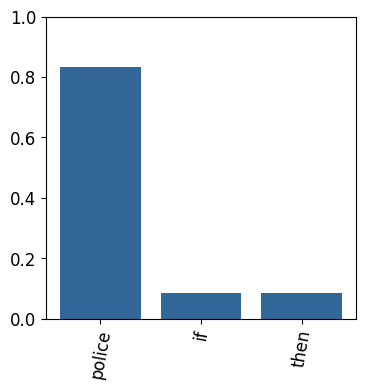

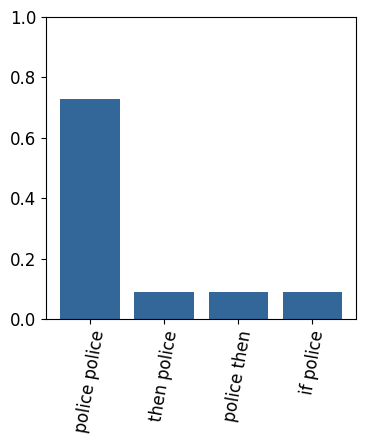

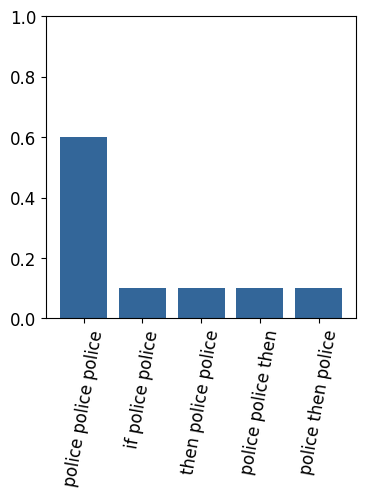

In [2]:
import matplotlib.pyplot as plt

print("N-gram frequencies for \"{}\"".format(" ".join(sentence2)))

def freq_conversion(ngram_multiset):
    total = sum(ngram_multiset.values())
    return {" ".join(key): val/total for key, val in ngram_multiset.items()}

def plotting_conversion(ngram_multiset):
    return list(zip(*sorted(ngram_multiset.items(), key=lambda x: x[1], reverse=True)))

unigrams = plotting_conversion(freq_conversion(ngram_multiset(sentence2, 1)))
bigrams = plotting_conversion(freq_conversion(ngram_multiset(sentence2, 2)))
trigrams = plotting_conversion(freq_conversion(ngram_multiset(sentence2, 3)))

for ngrams in [unigrams, bigrams, trigrams]:
    labels = ngrams[0]
    data = ngrams[1]
    plt.figure(figsize=(4,4), dpi=100)
    plt.bar(range(len(data)), data, color='#336699')
    plt.ylim((0,1))
    plt.xticks(range(len(data)), labels, rotation=80)
    plt.tick_params(axis='both', which='major', labelsize=12)
    # plt.text(str(label)+"-gram")
    plt.show()

<div class=exercise>
Construct a bag of words from the following text, then compute the relative frequency of each word:

<ul>
<li>John misses Mary</li>
<li>Mary misses Misses Chives</li>
<li>I hate chives with a passion</li>
<li>I love passion fruit</li>
</ul>

It is up to you to decide what should be treated as different words.
But take the opportunity to reflect on whether a computer program could easily make the distinctions you are making.
</div>

Counts and frequency information can be used in various ways, for example for search engines.
One can measure the relevance of a text for a given search query based on how much of the text consists of the words in the search query.

<div class=example>
The sentence *Only John thinks John thinks John likes John* corresponds to the multiset
$_MS \is \setof{\text{only}: 1, \text{john}: 4, \text{thinks}: 2, \text{likes}: 1}$.
With frequencies instead of counts this is
$_MS \is \setof{\text{only}: 0.125, \text{john}: 0.5, \text{thinks}: 0.25, \text{likes}: 0.5}$.
So the relevance score to the query *john* would be $0.5$.
</div>

<div class=exercise>
Suppose the sentence were *Only John thinks he thinks he thinks he likes himself*.
What would be the score of *john* in this case?
</div>

For practical purposes, both absolute counts and relative frequency can provide important information.
Absolute counts by themselves are not enough because a document that mentions *rules* 10 times might still not be a good match for "rules and representations" if the whole document contains 10,000 words.
On the other hand, a document containing just the phrase *rules schmules* would also be a horrible match despite 50% of it being mentions of *rules*.
There are many different strategies for optimising matches, and we will not go into details here.
However, it is instructive to see how queries consisting of multiple words can be handled mathematically.

## Multi-set sums and scalar multiplication for multi-word queries

Suppose a student has heard that the term *metaphysics* is somehow related to Aristotle and would like to learn more about that.
So they go to their search engine of choice and enter the search query *Aristotle metaphysics*.
How can the search engine provider make sure they will serve the user with a good list of matches?
Let us assume that the search engine already has absolute unigram, bigram, and trigram counts for each website.
The trigram counts won't matter since the query itself only consists of two words.
This leaves us with a choice between unigram and bigram counts.
But the search query wasn't meant as a bigram by the user, and very few texts contain the string *Aristotle metaphysics* although some might contain *Aristotle's metaphysics*.
A more promising route is to treat *Aristotle* and *metaphysics* as unigrams and find the website that has the highest combined number of tokens - this is surprisingly easy with multisets.

First, let us assume that the search engine is a large index of unigram multisets, each one of which encodes the unigram counts for a specific website.
Since we only care about the counts for *Aristotle* and *metaphysics*, we construct two new multisets that encode for each website how many tokens of *Aristotle* and *metaphysics* it contains.

<div class=example>
To keep the example simple we assume that our search engine has indexed only four websites, which we refer to as $w_1$, $w_2$, $w_3$, and $w_4$.
In doing so, it has only kept counts for a few words.
Each one of the four indeces created by the search enginge is represented as a multiset below:

$$
$$\begin{array}{rl}
    w_1 & \is \setof{\text{Aristotle}: 9, \text{ethics}: 3, \text{metaphysics}: 0, \text{Plato}: 6, \text{Sokrates}: 0}\\
    w_2 & \is \setof{\text{Aristotle}: 1, \text{ethics}: 0, \text{metaphysics}: 9, \text{Plato}: 5, \text{Sokrates}: 0}\\
    w_3 & \is \setof{\text{Aristotle}: 4, \text{ethics}: 9, \text{metaphysics}: 5, \text{Plato}: 8, \text{Sokrates}: 2}\\
    w_4 & \is \setof{\text{Aristotle}: 0, \text{ethics}: 7, \text{metaphysics}: 3, \text{Plato}: 9, \text{Sokrates}: 0}\\
\end{array}$$
$$

From this we construct an *Aristotle* multiset $_MA$ and a *metaphysics* multiset $_MP$ (naming it $_MM$ would be too confusing).
$$
$$\begin{array}{rl}
    _MA & \is \setof{w_1: 9, w_2: 1, w_3: 4, w_4: 0}\\
    _MP & \is \setof{w_1: 0, w_2: 9, w_3: 5, w_4: 3}\\
\end{array}$$
$$
</div>

<div class=exercise>
Construct similar multisets for *ethics* and *Plato*.
</div>

At this point we have two multisets over websites that tell us how well each website fits the individual terms *Aristotle* and *metaphysics*.
However, we still need to combine them into some kind of aggregate score.
This is easily accomplished with **multiset sum**.
That sounds like a fancy operation, but it's little more than adding up the counts for each element across multisets.

<div class=example>
Here are the multisets $_MA$ and $_MP$ that we computed before.
$$
$$\begin{array}{rl}
    _MA & \is \setof{w_1: 9, w_2: 1, w_3: 4, w_4: 0}\\
    _MP & \is \setof{w_1: 0, w_2: 9, w_3: 5, w_4: 3}\\
\end{array}$$
$$
Their multiset sum is
$$
\begin{align*}
    _MA \multisum _MP & = \setof{w_1: 9+0, w_2: 1+9, w_3: 4+5, w_4: 0+3}\\
                      & = \setof{w_1: 9, w_2: 10, w_3: 9, w_4: 3}\\
\end{align*}
$$
The best match according to this measure is the website $w_2$, closely followed by $w_1$ and $w_3$.
</div>

<div class=exercise>
Calculate the multiset sum of the two multisets you constructed for *ethics* and *Plato* in the previous exercise.
</div>

While multiset sum offers an easy way to convert the multisets produced according to the query into a single score for each website, it is also a bit too simplistic.
Multiset sum is *commutative*, which means that the order of arguments does not matter: $_MA \multisum _MP = _MP \multisum _MA$.
But the same arguably isn't true for the order of unigrams in a search query.
The fact that the student typed *Aristotle metaphysics* rather than *metaphysics Aristotle* suggests that *Aristotle* may be more important. 
In line with this interpretation we can use **scalar multiplication** to assign $_MA$ a greater weight relative to $_MP$.

<div class=example>
The values of $_MP$ and $_MP$ are listed here once more for the sake of easier reference:
$$
$$\begin{array}{rl}
    _MA & \is \setof{w_1: 9, w_2: 1, w_3: 4, w_4: 0}\\
    _MP & \is \setof{w_1: 0, w_2: 9, w_3: 5, w_4: 3}\\
\end{array}$$
$$
Suppose that $_MA$ should be about 50% more important than $_MP$.
We can express this by multiplying $_MA$ by $3$ and $_MP$ by $2$.
Since $\frac{3}{2} = 1.5$, this assigns $_MA$ a 50% higher weight than $_MP$.
$$
\begin{align*}
    3 \multimult _MA &= \setof{w_1: 3 \mult 9, w_2: 3 \mult 1, w_3: 3 \mult 4, w_4: 3 \mult 0}\\
                     &= \setof{w_1: 27, w_2: 3, w_3: 12, w_4: 0}\\
    2 \multimult _MP &= \setof{w_1: 2 \mult 0, w_2: 2 \mult 9, w_3: 2 \mult 5, w_4: 2 \mult 3}\\
                     &= \setof{w_1: 0, w_2: 18, w_3: 10, w_4: 6}\\
\end{align*}
$$
As before, we combine the two multisets via multiset sum.
$$
\begin{align*}
    3 \multimult _MA \multisum 2 \multimult _MP &= \setof{w_1: 27 \multisum 0, w_2: 3 \multisum 18, w_3: 12 \multisum 10, w_4: 0 \multisum 6}\\
                                        &= \setof{w_1: 27, w_2: 21, w_3: 22, w_4: 6}\\
\end{align*}
$$
As you can see, $w_1$ is now the best match, followed by $w_3$ and $w_4$.
Considering that $w_1$ does not contain any mention of metaphysics, we actually ended up making things worse.
</div>

<div class=exercise>
Suppose the user entered *ethics Plato Aristotle*.
Use scalar multiplication to assign appropriate weights to each word (it is up to you to decide what is appropriate).
Then compute the multiset sum and determine which website is the best fit for the query.
</div>

## Recap

- Multisets are the formal foundation of bag of words models.
- Each text can be compressed into a multiset to keep track of counts for relevant words.
- Counts can be combined and manipulated with multiset sum and scalar multiplication.
- Counts are often converted to percentages, but the result is no longer a multiset.